In [2]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.2 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# 1. Import Data

In [2]:
df = pd.read_csv('data/temporalidad_1.csv')

In [3]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,ayer,0.531512,0.444552,-0.628866,0.999982,0.558667,0.390358,-0.571893,0.999950,0.573240,...,0.002032,0.0,0.586263,0.369453,0.015787,0.0,0.591011,0.364649,0.016186,0.0
1,ayer,0.523760,0.446381,-0.863971,0.999979,0.555421,0.390054,-0.809736,0.999940,0.570746,...,0.002171,0.0,0.585872,0.367204,0.016905,0.0,0.590366,0.363378,0.017241,0.0
2,ayer,0.520142,0.449467,-0.910053,0.999976,0.553396,0.390142,-0.857819,0.999930,0.569037,...,0.002352,0.0,0.585525,0.366949,0.017286,0.0,0.589961,0.363065,0.017627,0.0
3,ayer,0.518826,0.453118,-0.833561,0.999973,0.552243,0.391160,-0.780878,0.999921,0.567922,...,0.002106,0.0,0.586479,0.367533,0.016694,0.0,0.590912,0.363730,0.017028,0.0
4,ayer,0.516062,0.455297,-0.796919,0.999972,0.550848,0.391820,-0.745363,0.999919,0.567112,...,0.002066,0.0,0.586989,0.367449,0.016398,0.0,0.591427,0.363495,0.016752,0.0


In [4]:
df['class'].unique()

array(['ayer', 'hoy', 'dia'], dtype=object)

In [5]:
print(df.isnull().sum())  # Null value

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v500     0
x501     0
y501     0
z501     0
v501     0
Length: 2005, dtype: int64


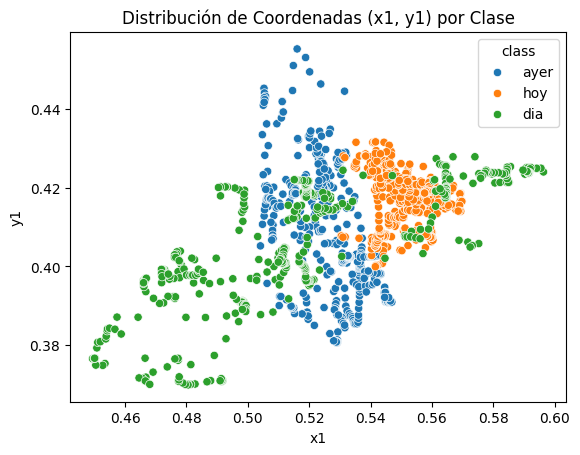

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for landmark (x1, y1)
sns.scatterplot(data=df, x='x1', y='y1', hue='class')
plt.title('Distribución de Coordenadas (x1, y1) por Clase')
plt.show()


# 2. Balancing the data

In [85]:
# Balancing the data
oversampler = RandomOverSampler(sampling_strategy={'hoy': 4000, 'ayer': 4000, 'dia': 4000})


In [86]:
X = df.drop('class', axis=1) # coordenadas
y = df['class'] # clase

In [87]:
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [88]:
print(y_resampled.value_counts())

class
ayer    4000
hoy     4000
dia     4000
Name: count, dtype: int64


# 3. Divide data into training and test

In [89]:
from sklearn.model_selection import train_test_split

# Divide data into training and test, keeping the ratio of classes with stratify
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [90]:
print(X_train.isnull().sum())

x1      0
y1      0
z1      0
v1      0
x2      0
       ..
v500    0
x501    0
y501    0
z501    0
v501    0
Length: 2004, dtype: int64


In [91]:
print(y_train.isnull().sum())

0


In [92]:
print(X_train.dtypes)

x1      float64
y1      float64
z1      float64
v1      float64
x2      float64
         ...   
v500    float64
x501    float64
y501    float64
z501    float64
v501    float64
Length: 2004, dtype: object


In [93]:
print(y_train.value_counts())

class
dia     2800
hoy     2800
ayer    2800
Name: count, dtype: int64


In [94]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
7010,0.512133,0.404538,-0.562352,0.999934,0.533315,0.362256,-0.478279,0.999821,0.545803,0.363807,...,0.003524,0.0,0.542413,0.349960,0.019445,0.0,0.547174,0.346475,0.019882,0.0
9240,0.531717,0.407527,-0.739455,0.999982,0.564122,0.361193,-0.679643,0.999960,0.578137,0.363376,...,0.000554,0.0,0.584004,0.342543,0.005369,0.0,0.588975,0.337815,0.005053,0.0
7914,0.537550,0.423176,-0.624615,0.999995,0.563591,0.381481,-0.549662,0.999981,0.576478,0.385318,...,0.000174,0.0,0.584476,0.358917,0.009830,0.0,0.588799,0.355104,0.009660,0.0
6638,0.595522,0.424973,-0.727240,0.999985,0.614813,0.382151,-0.638810,0.999959,0.628128,0.384458,...,0.003813,0.0,0.623095,0.368373,0.018662,0.0,0.627687,0.363604,0.019132,0.0
2726,0.532487,0.402697,-0.652271,0.999983,0.555620,0.353133,-0.591246,0.999963,0.570082,0.354215,...,0.004191,0.0,0.587315,0.351677,0.017933,0.0,0.591856,0.347411,0.018507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.539931,0.402458,-0.713715,0.999969,0.560393,0.352295,-0.648009,0.999929,0.572656,0.353100,...,0.005527,0.0,0.590107,0.345562,0.020257,0.0,0.594541,0.341435,0.020909,0.0
7664,0.564699,0.418376,-0.631289,0.999992,0.591437,0.376066,-0.558798,0.999974,0.604625,0.377845,...,0.002220,0.0,0.614908,0.368772,0.013052,0.0,0.619401,0.363502,0.013452,0.0
11051,0.545786,0.422153,-0.700065,0.999963,0.568958,0.372838,-0.646902,0.999913,0.581871,0.373911,...,0.002969,0.0,0.595760,0.357344,0.014925,0.0,0.600458,0.351317,0.015409,0.0
7983,0.512272,0.401048,-0.489096,0.999982,0.531063,0.358820,-0.403847,0.999946,0.544121,0.360968,...,0.004650,0.0,0.538121,0.356106,0.019024,0.0,0.543387,0.350060,0.019755,0.0


In [95]:
y_train

7010      dia
9240      hoy
7914      dia
6638      dia
2726     ayer
         ... 
1722     ayer
7664      dia
11051     hoy
7983      dia
2668     ayer
Name: class, Length: 8400, dtype: object

# 4. Train models

In [96]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [97]:
pipelines = {
    'lr':make_pipeline(LogisticRegression(max_iter=500)),
    'rc':make_pipeline(RidgeClassifier()),
    'rf':make_pipeline(RandomForestClassifier())
    #'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    #'svm':make_pipeline(StandardScaler(), SVC())
}

In [98]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf'])

In [99]:
print(y_train.value_counts())

class
dia     2800
hoy     2800
ayer    2800
Name: count, dtype: int64


In [100]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
7010,0.512133,0.404538,-0.562352,0.999934,0.533315,0.362256,-0.478279,0.999821,0.545803,0.363807,...,0.003524,0.0,0.542413,0.349960,0.019445,0.0,0.547174,0.346475,0.019882,0.0
9240,0.531717,0.407527,-0.739455,0.999982,0.564122,0.361193,-0.679643,0.999960,0.578137,0.363376,...,0.000554,0.0,0.584004,0.342543,0.005369,0.0,0.588975,0.337815,0.005053,0.0
7914,0.537550,0.423176,-0.624615,0.999995,0.563591,0.381481,-0.549662,0.999981,0.576478,0.385318,...,0.000174,0.0,0.584476,0.358917,0.009830,0.0,0.588799,0.355104,0.009660,0.0
6638,0.595522,0.424973,-0.727240,0.999985,0.614813,0.382151,-0.638810,0.999959,0.628128,0.384458,...,0.003813,0.0,0.623095,0.368373,0.018662,0.0,0.627687,0.363604,0.019132,0.0
2726,0.532487,0.402697,-0.652271,0.999983,0.555620,0.353133,-0.591246,0.999963,0.570082,0.354215,...,0.004191,0.0,0.587315,0.351677,0.017933,0.0,0.591856,0.347411,0.018507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.539931,0.402458,-0.713715,0.999969,0.560393,0.352295,-0.648009,0.999929,0.572656,0.353100,...,0.005527,0.0,0.590107,0.345562,0.020257,0.0,0.594541,0.341435,0.020909,0.0
7664,0.564699,0.418376,-0.631289,0.999992,0.591437,0.376066,-0.558798,0.999974,0.604625,0.377845,...,0.002220,0.0,0.614908,0.368772,0.013052,0.0,0.619401,0.363502,0.013452,0.0
11051,0.545786,0.422153,-0.700065,0.999963,0.568958,0.372838,-0.646902,0.999913,0.581871,0.373911,...,0.002969,0.0,0.595760,0.357344,0.014925,0.0,0.600458,0.351317,0.015409,0.0
7983,0.512272,0.401048,-0.489096,0.999982,0.531063,0.358820,-0.403847,0.999946,0.544121,0.360968,...,0.004650,0.0,0.538121,0.356106,0.019024,0.0,0.543387,0.350060,0.019755,0.0


### 4.1 Hiperparametros

In [101]:
param_grids = {
    'lr': {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'rc': {'ridgeclassifier__alpha': [0.1, 1.0, 10.0]},
    'rf': {'randomforestclassifier__n_estimators': [50, 100, 200],
           'randomforestclassifier__max_depth': [None, 10, 20],
           'randomforestclassifier__min_samples_split': [2, 5],
           'randomforestclassifier__min_samples_leaf': [1, 2],
           'randomforestclassifier__max_features': ['sqrt', 'log2']}
}


In [102]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Perform grid search with cross-validation for each model
best_models = {}
for key, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[key], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[key] = grid_search.best_estimator_
    print(f"Mejores parámetros para {key}: {grid_search.best_params_}")
    print(f"Precisión media de validación cruzada para {key}: {grid_search.best_score_}")


Mejores parámetros para lr: {'logisticregression__C': 0.001}
Precisión media de validación cruzada para lr: 1.0
Mejores parámetros para rc: {'ridgeclassifier__alpha': 0.1}
Precisión media de validación cruzada para rc: 1.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros para rf: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
Precisión media de validación cruzada para rf: 1.0


In [103]:
# Train the best models on the entire training set and evaluate on the test set
fit_models = {}
predictions = {}
for key, model in best_models.items():
    y_pred = model.predict(X_test)
    fit_models[key] = model
    predictions[key] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión en el conjunto de prueba para {key}: {accuracy}")


Precisión en el conjunto de prueba para lr: 1.0
Precisión en el conjunto de prueba para rc: 1.0
Precisión en el conjunto de prueba para rf: 1.0


In [43]:
'''fit_models = {}
predictions = {}
for clave_model, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fit_models[clave_model] =  model
    predictions[clave_model] = y_pred
fit_models
'''

{'lr': Pipeline(steps=[('logisticregression',
                  LogisticRegression(C=0.01, max_iter=500))]),
 'rc': Pipeline(steps=[('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])}

In [52]:
predictions

{'lr': array(['ayer', 'hoy', 'ayer', ..., 'dia', 'ayer', 'ayer'], dtype=object),
 'rc': array(['ayer', 'hoy', 'ayer', ..., 'dia', 'ayer', 'ayer'], dtype='<U4'),
 'rf': array(['ayer', 'hoy', 'ayer', ..., 'dia', 'ayer', 'ayer'], dtype=object)}

# 5. Evaluate models

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  classification_report #Metricas

# Calculate accuracy, precision y recall for each model
evaluations = {}
for clave_model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Usamos output_dict=True para guardar los datos en formato diccionario
    evaluations[clave_model] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall']
    }

# Mostrar resultados
for clave_model, metrics in evaluations.items():
    print(f"Modelo: {clave_model}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precisión (weighted avg): {metrics['precision']}")
    print(f"Recall (weighted avg): {metrics['recall']}\n")


Modelo: lr
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0

Modelo: rc
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0

Modelo: rf
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0



## 5.3 Matriz de confusión

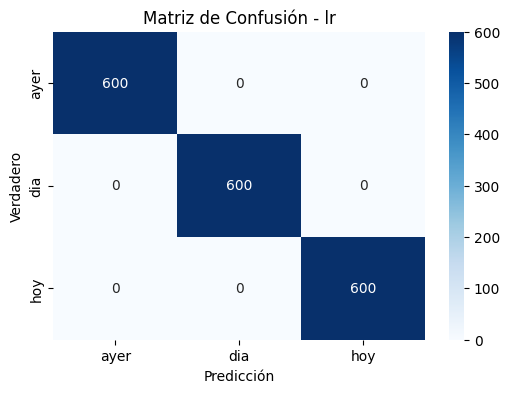

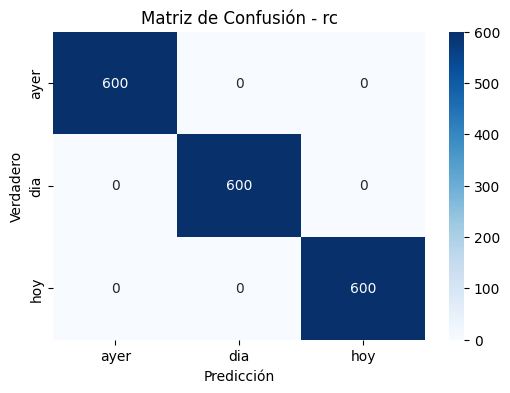

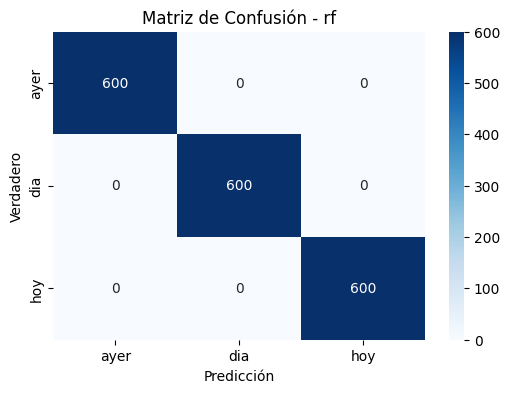

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear las matrices de confusión y visualizarlas
for clave_model, y_pred in predictions.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_,
            yticklabels=model.classes_)
    plt.title(f'Matriz de Confusión - {clave_model}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()


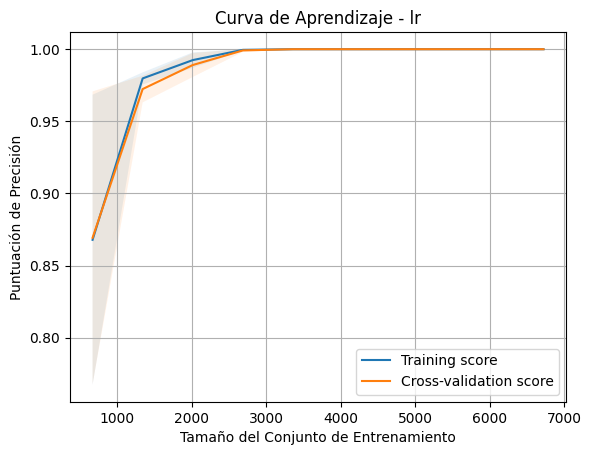

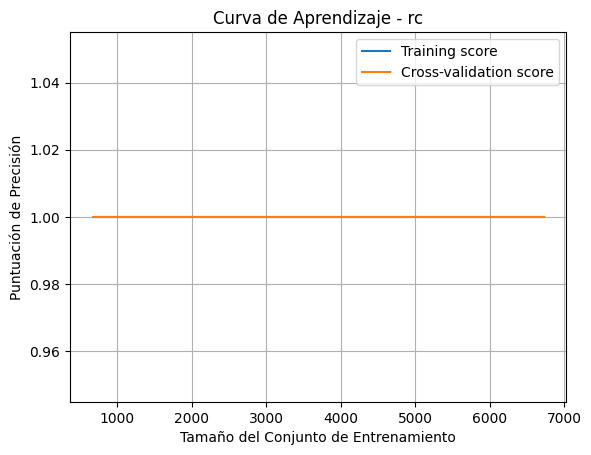

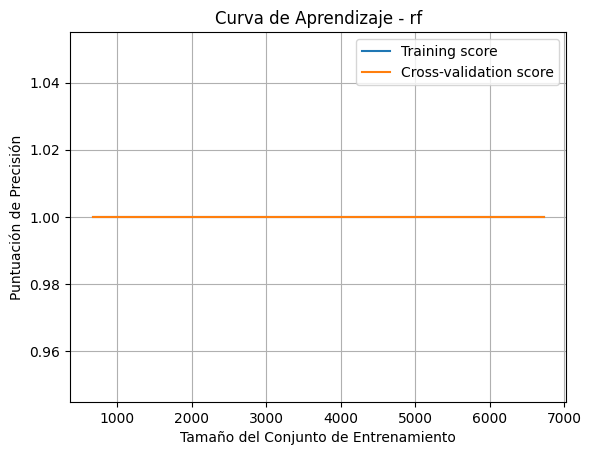

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Crear curvas de aprendizaje para cada modelo
for algo, model in fit_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcular la media y la desviación estándar de los puntajes
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title(f"Curva de Aprendizaje - {algo}")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación de Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
